# Exercises from Ryan

Create a new notebook or Python script named evaluate.
Evaluating simple linear regressions on lemonade data with other features:
1. Create a dataframe from the csv at https://gist.githubusercontent.com/ryanorsinger/c303a90050d3192773288f7eea97b708/raw/536533b90bb2bf41cea27a2c96a63347cde082a6/lemonade.csv
2. Make a baseline for predicting sales. (The mean is a good baseline)
3. Create a new dataframe to hold residuals.
4. Calculate the baseline residuals.
5. Use ols from statsmodels to create a simple linear regression (1 independent variable, 1 dependent variable) to predict sales using flyers.

`the df variable is lemonade data

model = ols('sales ~ flyers', data=df).fit()   
predictions = model.predict(df.x)`

1. Use the .predict method from ols to produce all of our predictions. Add these predictions to the data
2. Calculate that model's residuals.
3. Evaluate that model's performance and answer if the model is significant.
4. Evaluate that model's performance and answer if the feature is significant.

#### Repetition Improves Performance!
- In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the rainfall model over the flyers model?
- In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? Would you prefer the log_rainfall model over the flyers model? Would you prefer the model built with log_rainfall over the rainfall model from before?
- In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. Does this model beat the baseline? Would you prefer the rainfall, log_rainfall, or the flyers model?
- Which of these 4 single regression models would you want to move forward with?


#### Tips dataset
1. Load the tips dataset from pydataset or seaborn
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:
`from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()

predictions = model.predict(df.x)`

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
4. What is the amount of variance explained in your model?
5. Is your model significantly better than the baseline model?
6. Plot the residuals for the linear regression model that you made.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

# Linear Model
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#1. create dataframe
df = pd.read_clipboard(sep=',', index_col=0)

In [ ]:
df.head()

In [ ]:
# 2. Make a baseline
baseline = df.Sales.mean()
baseline

In [ ]:
# 3. create dataframe to hold baseline residuals
# 4. calculate baseline residuals
# evaluate = pd.DataFrame()

# evaluate["x"] = df.flyers

# # Our y is our dependent variable
# evaluate["y"] = df.sales
# evaluate["baseline"] = df.sales.mean()

# # y-hat is shorthand for "predicted y" values
# evaluate["yhat"] = model.predict()

# # Calculate the baseline residuals 
# # Residual is predicted minus actual
# evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

# # Calculate the model residuals
# evaluate["model_residual"] = evaluate.yhat - evaluate.y

# evaluate.head(4)

eval1 = pd.DataFrame()
eval1['x_flyers'] = df.Flyers
eval1['y_sales'] = df.Sales
eval1['baseline'] = df.Sales.mean()
eval1['baseline_residual'] = eval1.baseline - eval1.y_sales

eval1.head()

In [ ]:
# 5. 
# Pre-requisite Part 2 - build/identify a super simple linear model
# We'll use statsmodels OLS (ordinary least squares method here)

# The arguments to the ols function are the column names as strings, separated by ~
# ols("y ~ x") 
# ols("target ~ feature")

model1 = ols('Sales ~ Flyers', df).fit()


In [ ]:
# 5.1 Use the .predict method from ols to produce all of our predictions.
# Add these predictions to the data

eval1["yhat1"] = model1.predict()

In [ ]:
# 5.2 Calculate that model's residuals.

eval1["model1_residual"] = eval1.yhat1 - eval1.y_sales

In [ ]:
# 5.3 Evaluate that model's performance and answer if the model is significant.
# Calculate if the model beats the baseline
# Square errors for 2 reasons
# 1. Squaring large numbers increases their magnitude (opposite for small)
# 2. Squaring removes negative residuals
baseline_sse = (eval1.baseline_residual**2).sum()
model1_sse = (eval1.model1_residual**2).sum()

if model1_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model1_sse)

In [ ]:
# Take the average of the Sum of squared errors
# mse = model_sse / len(evaluate)

# Or we could calculate this using sklearn's mean_squared_error function
mse1 = mean_squared_error(eval1.y_sales, eval1.yhat1)

# Now we'll take the Square Root of the Sum of Errors
# Taking the square root is nice because the units of the error 
# will be in the same units as the target variable.
rmse1 = sqrt(mse1)

print("Model 1 evaluates flyers and sales")
print("SSE is", model1_sse, " which is the sum sf squared errors")
print("MSE is", mse1, " which is the average squared error")
print("RMSE is", rmse1, " which is the square root of the MSE")

In [ ]:
r2m1 = model1.rsquared
print('R-squared = ', round(r2m1,3))

f_pval1 = model1.f_pvalue
print("p-value for model significance = ", f_pval1)

In [ ]:
f_pval1 < .05

In [ ]:
# 5.4 Evaluate that model's performance and answer if the feature is significant.
# the model only has 1 feature so if the model is significant (and it is) then the feature is significant


#### In the next section of your notebook, perform the steps above with the rainfall column as the model's feature. 

#### Does this model beat the baseline? 

#### Would you prefer the rainfall model over the flyers model?


In [ ]:
eval2 = pd.DataFrame()
eval2['x_flyers'] = df.Flyers
eval2['y_sales'] = df.Sales
eval2['baseline'] = df.Sales.mean()
eval2['baseline_residual'] = eval2.baseline - eval2.y_sales
model2 = ols('Sales ~ Rainfall', df).fit()
eval2["yhat2"] = model2.predict()
eval2["model2_residual"] = eval2.yhat2 - eval2.y_sales

eval2.head()

In [ ]:
baseline_sse = (eval2.baseline_residual**2).sum()
model2_sse = (eval2.model2_residual**2).sum()

if model2_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model2_sse)

In [ ]:
mse2 = mean_squared_error(eval2.y_sales, eval2.yhat2)
rmse2 = sqrt(mse2)

print("Model 2 evaluates rainfall and sales")
print("SSE is", model2_sse, " which is the sum sf squared errors")
print("MSE is", mse2, " which is the average squared error")
print("RMSE is", rmse2, " which is the square root of the MSE")

In [ ]:
r2m2 = model2.rsquared
print('R-squared = ', round(r2m2,3))

f_pval2 = model2.f_pvalue
print("p-value for model significance = ", f_pval2)

In [ ]:
f_pval2 < .05

In [ ]:
# the rainfall model performs better than the flyers model, the SSE is almost half that of the flyers model

#### In the next section of your notebook, perform the steps above with the log_rainfall column as the model's feature. Does this model beat the baseline? 

#### Would you prefer the log_rainfall model over the flyers model? 

#### Would you prefer the model built with log_rainfall over the rainfall model from before?

In [ ]:
# add the log rainfall column to the df
df["log_rainfall"] = np.log(df.Rainfall)

In [ ]:
df.head()

In [ ]:
eval3 = pd.DataFrame()
eval3['x_flyers'] = df.Flyers
eval3['y_sales'] = df.Sales
eval3['baseline'] = df.Sales.mean()
eval3['baseline_residual'] = eval3.baseline - eval3.y_sales
model3 = ols('Sales ~ log_rainfall', df).fit()
eval3["yhat3"] = model3.predict()
eval3["model3_residual"] = eval3.yhat3 - eval3.y_sales

eval3.head()

In [ ]:
baseline_sse = (eval3.baseline_residual**2).sum()
model3_sse = (eval3.model3_residual**2).sum()

if model3_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model3_sse)

In [ ]:
mse3 = mean_squared_error(eval3.y_sales, eval3.yhat3)
rmse3 = sqrt(mse3)

print("Model 3 evaluates log_rainfall and sales")
print("SSE is", model3_sse, " which is the sum sf squared errors")
print("MSE is", mse3, " which is the average squared error")
print("RMSE is", rmse3, " which is the square root of the MSE")

In [ ]:
r2m3 = model3.rsquared
print('R-squared = ', round(r2m3,3))

f_pval3 = model3.f_pvalue
print("p-value for model significance = ", f_pval3)

In [ ]:
f_pval3 < .05

In [ ]:
# The log_rainfall performs better than the flyers model and better than Rainfall model.
# The SSE for the log_rainfall model is half that of the Rainfall model

#### In the next section of your notebook, perform the steps above with the temperature column as the model's only feature. 

#### Does this model beat the baseline? 

#### Would you prefer the rainfall, log_rainfall, or the flyers model?

In [ ]:
eval4 = pd.DataFrame()
eval4['x_flyers'] = df.Flyers
eval4['y_sales'] = df.Sales
eval4['baseline'] = df.Sales.mean()
eval4['baseline_residual'] = eval4.baseline - eval4.y_sales
model4 = ols('Sales ~ Temperature', df).fit()
eval4["yhat4"] = model4.predict()
eval4["model4_residual"] = eval4.yhat4 - eval4.y_sales

eval4.head()

In [ ]:
baseline_sse = (eval4.baseline_residual**2).sum()
model4_sse = (eval4.model4_residual**2).sum()

if model4_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model4_sse)

In [ ]:
mse4 = mean_squared_error(eval4.y_sales, eval4.yhat4)
rmse4 = sqrt(mse4)

print("Model 4 evaluates temperature and sales")
print("SSE is", model4_sse, " which is the sum sf squared errors")
print("MSE is", mse4, " which is the average squared error")
print("RMSE is", rmse4, " which is the square root of the MSE")

In [ ]:
r2m4 = model4.rsquared
print('R-squared = ', round(r2m4,3))

f_pval4 = model4.f_pvalue
print("p-value for model significance = ", f_pval4)

In [ ]:
f_pval4 < .05

In [ ]:
# This model has the best performance of all 4 models with the lowest SSE, MSE, RMSE, and p-value
# and the R-squared value is the closest to 1

### Tips dataset
1. Load the tips dataset from pydataset or seaborn
2. Define your baseline for "tip". Our goal will be to see if we can make a model that is better than baseline for predicting tips on total_bill.
3. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. Here is some sample code to get you started:
`from statsmodels.formula.api import ols
from pydataset import data

df = data("tips")

model = ols('tip ~ total_bill', data=df).fit()

predictions = model.predict(df.x)`

1. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
2. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).
3. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.
4. What is the amount of variance explained in your model?
5. Is your model significantly better than the baseline model?
6. Plot the residuals for the linear regression model that you made.

In [ ]:
df = data('tips')

In [ ]:
df.head()

In [ ]:
# create model object
mo1 = ols('tip ~ total_bill', df).fit()
x = 'total_bill'
y = 'tip'


In [ ]:
def make_evaldf(x, y, model_object, df):
    evaldf = pd.DataFrame()
    evaldf['x'] = df[x]
    evaldf['y'] = df[y]
    evaldf['baseline'] = df[y].mean()
    evaldf['baseline_residual'] = evaldf.baseline - evaldf.y
    evaldf["yhat"] = model_object.predict()
    evaldf["model_residual"] = evaldf.yhat - evaldf.y
    return evaldf


In [ ]:
evaldf = make_evaldf(x, y, mo1, df)

In [ ]:
evaldf.head()

In [ ]:
def metrics(df, model_object):
    baseline_sse = (df.baseline_residual**2).sum()
    model_sse = (df.model_residual**2).sum()

    if model_sse < baseline_sse:
        print("Our model beats the baseline")
        print("It makes sense to evaluate this model more deeply.")
    else:
        print("Our baseline is better than the model.")

    print("Baseline SSE", baseline_sse)
    print("Model SSE", model4_sse)
    
    mse = mean_squared_error(df.y, df.yhat)
    rmse = sqrt(mse)

    print("MSE is", mse, " which is the average squared error")
    print("RMSE is", rmse, " which is the square root of the MSE")
    
    r2 = model_object.rsquared
    print('R-squared = ', round(r2m4,3))

    f_pval = model_object.f_pvalue
    print("p-value for model significance = ", f_pval)
    
    alpha = .05
    print(f'f_pval is less than {alpha} = {f_pval<alpha}')

In [ ]:
metrics(evaldf, mo1)

In [ ]:
# What is the amount of variance explained in your model?
# that is the r-squared value which is 0.98

In [ ]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

In [ ]:
plot_residuals(evaldf.y, evaldf.yhat)

# Curiculum Exercises - per Ryan optional

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

`from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()

predictions = model.predict(df.x)`

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model significantly better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot   

regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)   
explained sum of squares (ESS)   
total sum of squares (TSS)   
mean squared error (MSE)   
root mean squared error (RMSE)  

baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model   

better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [ ]:
# 1. Load the tips dataset from either pydataset or seaborn.
df = data('tips')
df.head()

In [ ]:
# 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
evaldf = make_evaldf(x, y, mo1, df)
evaldf.head()

In [ ]:
# 3. Plot the residuals for the linear regression model that you made.
plot_residuals(evaldf.y, evaldf.yhat)

In [ ]:
# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, 
# and root mean squared error for your model.
# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model
# (i.e. a model that always predicts the average tip amount).
# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors
# for the baseline model and outputs whether or not your model performs better than the baseline model.
metrics(evaldf, mo1)

In [ ]:
# 7. Write python code that compares the sum of squared errors for your model against the sum of squared errors
# for the baseline model and outputs whether or not your model performs better than the baseline model.
# that is the r-squared value which is 0.98

In [ ]:
# 8. Is your model significantly better than the baseline model?
# yes, the f_pval is < alpha of .05

In [ ]:
# 9. Create a file named evaluate.py that contains the following functions

# create model object
def make_model_object(feature, target, df):
    model_object = ols('target ~ feature', df).fit()
    x = feature
    y = target
    return model_object

# create evaluation dataframe
def make_evaldf(feature, target, model_object, df):
    evaldf = pd.DataFrame()
    evaldf['feature'] = df[feature]
    evaldf['target'] = df[target]
    evaldf['baseline'] = df[target].mean()
    evaldf['baseline_residual'] = evaldf.baseline - evaldf.target
    evaldf["yhat"] = model_object.predict()
    evaldf["model_residual"] = evaldf.yhat - evaldf.target
    return evaldf

# create dataframe metrics from evaluation datafram
def metrics(df, model_object):
    baseline_sse = (df.baseline_residual**2).sum()
    model_sse = (df.model_residual**2).sum()

    if model_sse < baseline_sse:
        print("Our model beats the baseline")
        print("It makes sense to evaluate this model more deeply.")
    else:
        print("Our baseline is better than the model.")

    print("Baseline SSE", baseline_sse)
    print("Model SSE", model_sse)
    
    mse = mean_squared_error(df.target, df.yhat)
    rmse = sqrt(mse)

    print("MSE is", mse, " which is the average squared error")
    print("RMSE is", rmse, " which is the square root of the MSE")
    
    r2 = model_object.rsquared
    print('R-squared = ', round(r2,3))

    f_pval = model_object.f_pvalue
    print("p-value for model significance = ", f_pval)
    
    alpha = .05
    print(f'f_pval is less than {alpha} = {f_pval<alpha}')
    
# make a plot to visualize residuals
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

In [10]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data
import evaluate


In [11]:
# 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement.
# Take a look at all the regression evaluation metrics, and determine whether this model is better 
# than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [12]:
mpgdf = data('mpg')
mpgdf.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [13]:
mpgdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


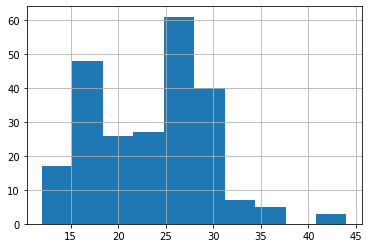

In [14]:
mpgdf.hwy.hist()

In [3]:
# target = highway mileage, feature = engine displacement
# create model object
target = 'hwy'
feature = 'displ'
mod_obj = evaluate.make_model_object(target, feature, mpgdf)

In [4]:
evalmpg = evaluate.make_evaldf(feature, target, mod_obj, mpgdf)
evalmpg.head()

,feature,target,baseline,baseline_residual,yhat,model_residual
1,1.8,29,23.440171,-5.559829,29.342591,0.342591
2,1.8,29,23.440171,-5.559829,29.342591,0.342591
3,2.0,31,23.440171,-7.559829,28.636473,-2.363527
4,2.0,30,23.440171,-6.559829,28.636473,-1.363527
5,2.8,26,23.440171,-2.559829,25.812002,-0.187998


In [5]:
metricsmpg = evaluate.metrics(evalmpg, mod_obj)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 8261.66239316239
Model SSE 3413.829008995466
MSE is 14.589012858954984  which is the average squared error
RMSE is 3.819556631201452  which is the square root of the MSE
R-squared =  0.587
p-value for model significance =  2.0389744555910457e-46
f_pval is less than 0.05 = True


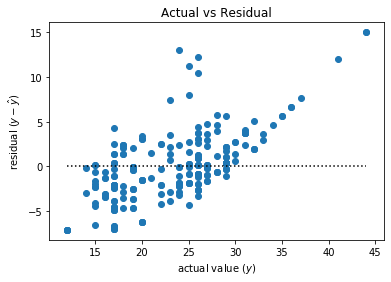

In [6]:
# note y=target, yhat = predictions
evaluate.plot_residuals(evalmpg.target, evalmpg.yhat)

In [7]:
# From fp-value < .05 conclude the feature is significant and the model beats the baseline